## IF4091 Pembelajaran Mesin
## Praktikum II: 

**Anggota Kelompok**
- **13515021 - Dewita Sonya T**
- **13515057 - Erick Wijaya**
- **13515063 - Kezia Suhendra**

**Kelas: K01**

# Import Statements

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Preprocessing

In [51]:
raw_train_df = pd.read_csv('datasets/train.csv')
raw_test_df = pd.read_csv('datasets/train.csv')

drop_columns = ['affect', 'argumentation', 'better_solution', 'change', 'comparison', 'continue', 'contrast',
                'interest', 'need', 'presentation', 'problem', 'research', 'solution', 'textstructure', 'use', 
                'copula', 'aim_ref_agent', 'gap_agent', 'general_agent', 'ref_agent', 'ref_us_agent', 
                'textstructure_agent', 'them_agent', 'them_pronoun_agent', 'us_agent', 'no_textstructure_formulaic',
                'them_formulaic']

# drop columns that only have one value
raw_train_df.drop(drop_columns, axis=1, inplace=True)
raw_test_df.drop(drop_columns, axis=1, inplace=True)
raw_train_df.columns

Index(['cont1', 'cont2a', 'cont3', 'loc', 'struct1', 'struct2', 'struct3',
       'length', 'cit1', 'cit2', 'syn', 'adj', 'affect_formulaic',
       'bad_formulaic', 'comparison_formulaic', 'continue_formulaic',
       'contrast_formulaic', 'detail_formulaic', 'future_formulaic',
       'gap_formulaic', 'good_formulaic', 'here_formulaic',
       'in_order_to_formulaic', 'method_formulaic', 'similarity_formulaic',
       'textstructure_formulaic', 'tradition_formulaic',
       'us_previous_formulaic', 'problem_formulaic', 'solution_formulaic',
       'our_aim_formulaic', 'negation', 'labelclass'],
      dtype='object')

cont1:


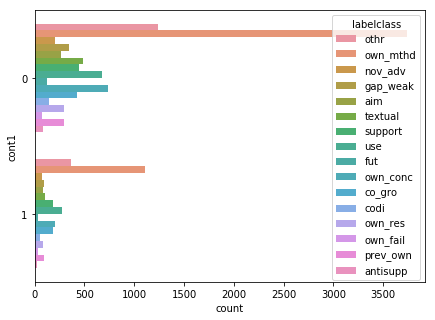

cont2a:


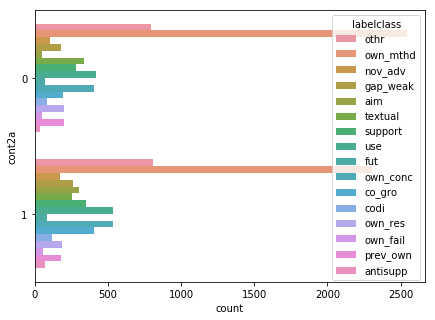

cont3:


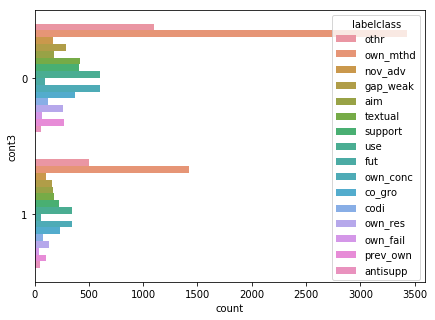

loc:


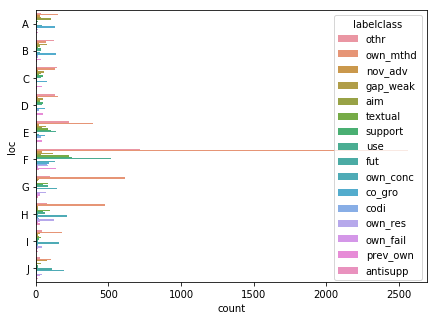

struct1:


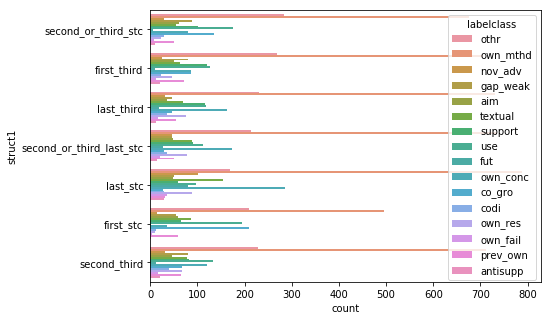

struct2:


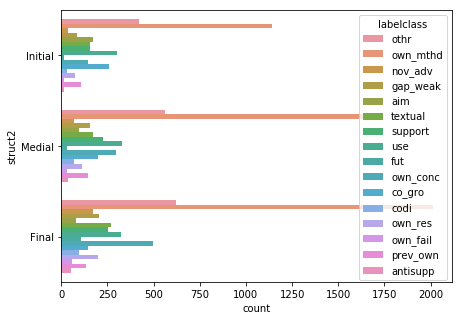

struct3:


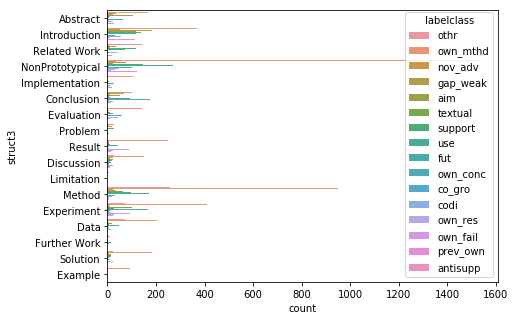

length:


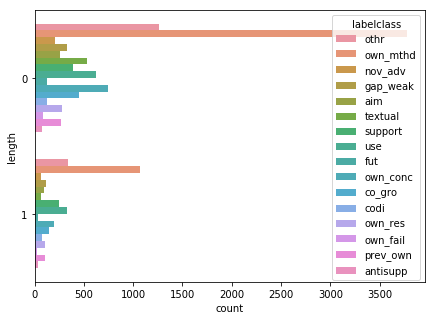

cit1:


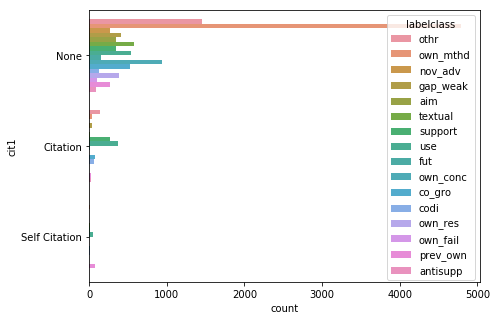

cit2:


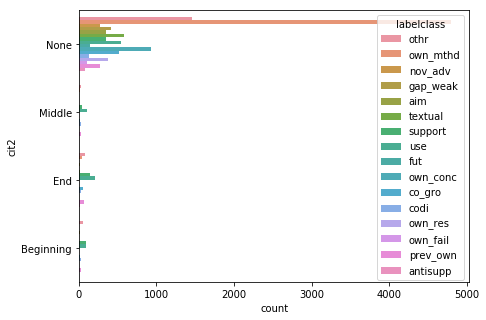

syn:


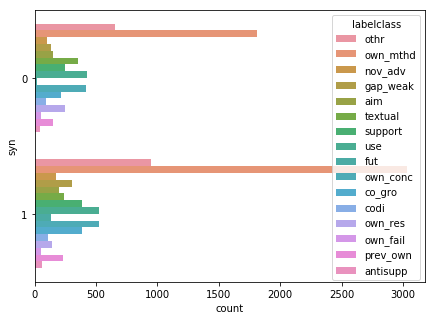

adj:


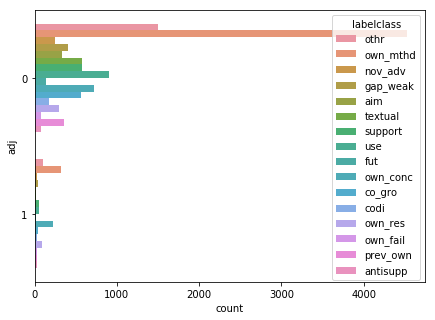

affect_formulaic:


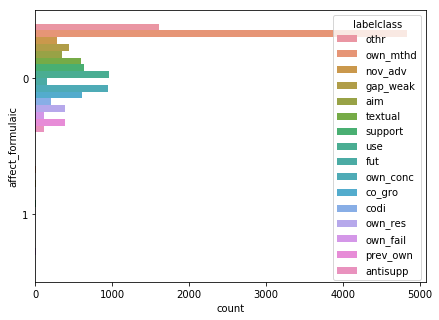

bad_formulaic:


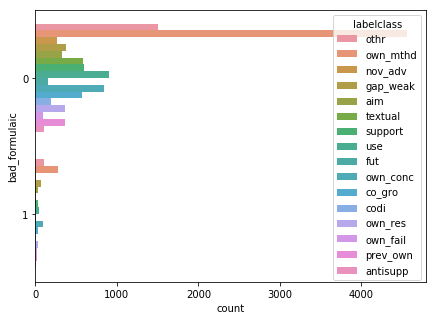

comparison_formulaic:


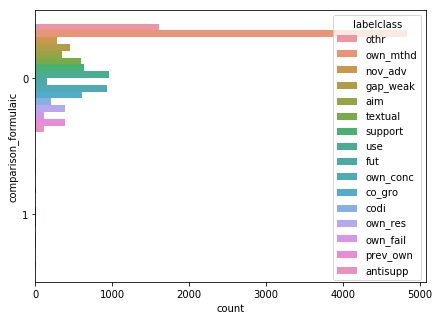

continue_formulaic:


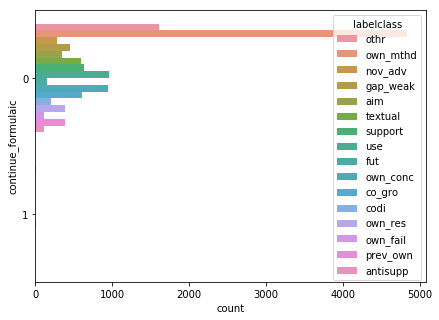

contrast_formulaic:


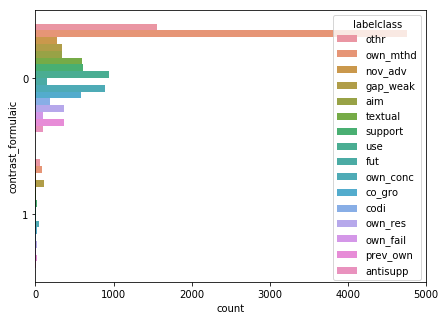

detail_formulaic:


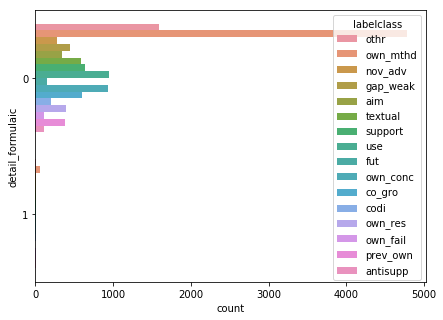

future_formulaic:


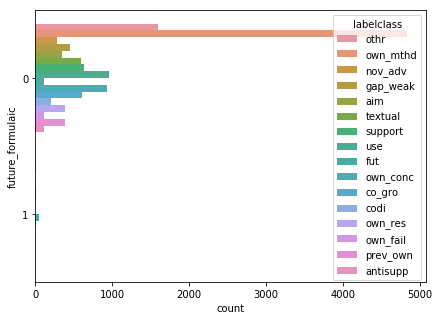

gap_formulaic:


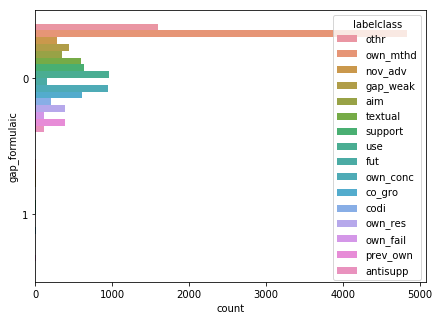

good_formulaic:


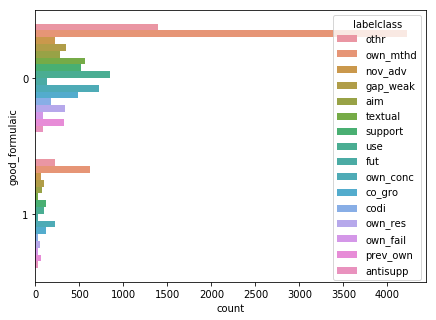

here_formulaic:


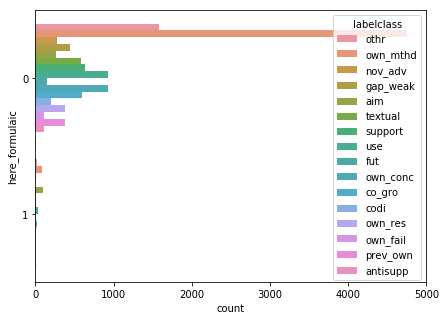

in_order_to_formulaic:


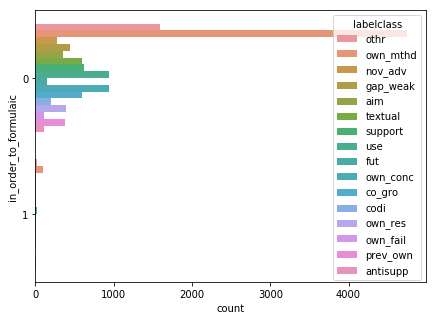

method_formulaic:


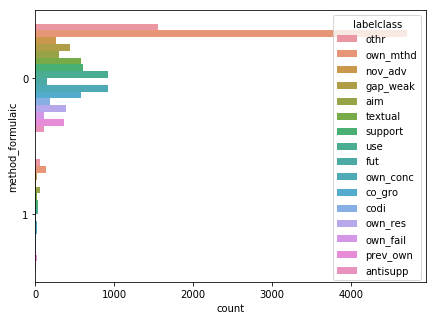

similarity_formulaic:


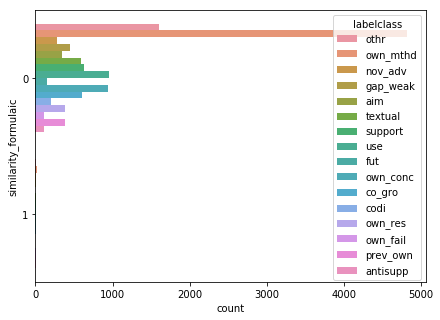

textstructure_formulaic:


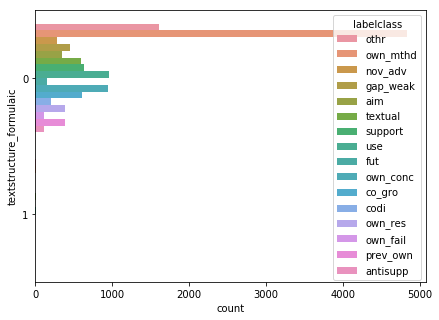

tradition_formulaic:


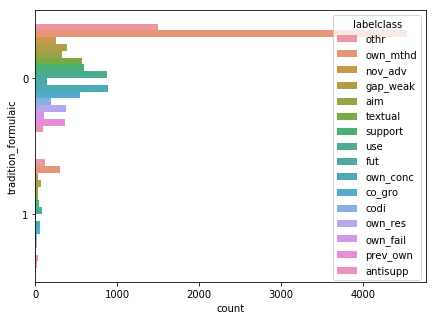

us_previous_formulaic:


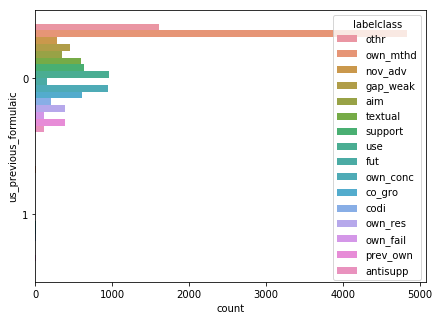

problem_formulaic:


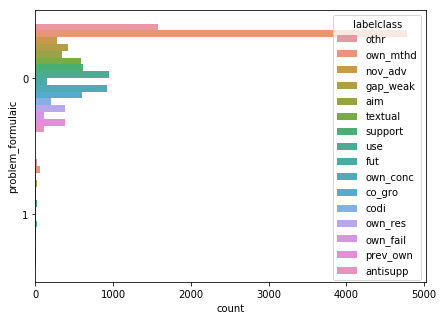

solution_formulaic:


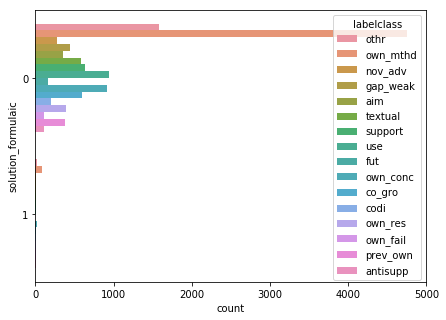

our_aim_formulaic:


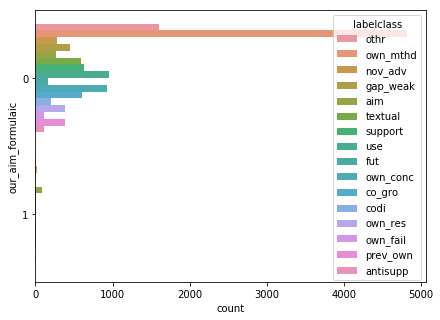

negation:


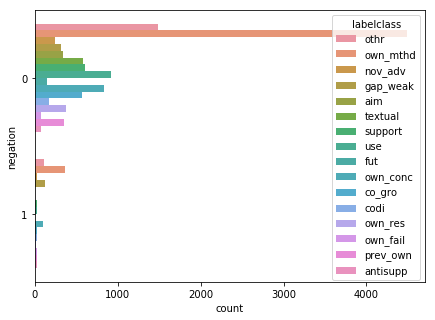

labelclass:


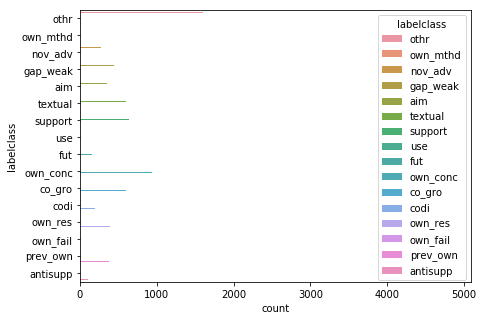

In [27]:
for col in raw_train_df:
    print(col+":")
    plt.figure(figsize = (7,5))
    sns.countplot(y=col, hue='labelclass', data=raw_train_df)
    plt.show()

In [52]:
train_df = raw_train_df
test_df = raw_test_df

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

struct2 = ['Initial', 'Medial', 'Final']
cit2 = ['None', 'Beginning', 'Middle', 'End']
le_columns = ['loc', 'struct1', 'struct3', 'cit1', 'labelclass', 'struct2', 'cit2']

for col in le_columns:
    le = LabelEncoder()
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# enc = LabelEncoder()
# enc.fit(struct2)
# new_struct2 = enc.transform(struct2)
# print(new_struct2)# [1 2 0]
# new_struct2 = new_struct2.reshape(-1, 1) # Needs to be the correct shape
# ohe = OneHotEncoder(sparse=False) #Easier to read
# ohe.fit(new_struct2)
# print(ohe.transform(train_df['struct2']))
    
print('Train:')
for col in raw_train_df:
    print(col, np.unique(raw_train_df[col]))
print()
print('Test:')
for col in raw_test_df:
    print(col, np.unique(raw_test_df[col]))

Train:
cont1 [0 1]
cont2a [0 1]
cont3 [0 1]
loc [0 1 2 3 4 5 6 7 8 9]
struct1 [0 1 2 3 4 5 6]
struct2 [0 1 2]
struct3 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
length [0 1]
cit1 [0 1 2]
cit2 [0 1 2 3]
syn [0 1]
adj [0 1]
affect_formulaic [0 1]
bad_formulaic [0 1]
comparison_formulaic [0 1]
continue_formulaic [0 1]
contrast_formulaic [0 1]
detail_formulaic [0 1]
future_formulaic [0 1]
gap_formulaic [0 1]
good_formulaic [0 1]
here_formulaic [0 1]
in_order_to_formulaic [0 1]
method_formulaic [0 1]
similarity_formulaic [0 1]
textstructure_formulaic [0 1]
tradition_formulaic [0 1]
us_previous_formulaic [0 1]
problem_formulaic [0 1]
solution_formulaic [0 1]
our_aim_formulaic [0 1]
negation [0 1]
labelclass [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Test:
cont1 [0 1]
cont2a [0 1]
cont3 [0 1]
loc [0 1 2 3 4 5 6 7 8 9]
struct1 [0 1 2 3 4 5 6]
struct2 [0 1 2]
struct3 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
length [0 1]
cit1 [0 1 2]
cit2 [0 1 2 3]
syn [0 1]
adj [0 

### K-Fold

In [4]:
income_df = pd.DataFrame()
income_test_df = pd.DataFrame()
le = {}
for feature in raw_df:
    le[feature] = LabelEncoder()
    income_df[feature] = le[feature].fit_transform(raw_df[feature])
    income_test_df[feature] = le[feature].fit_transform(raw_test_df[feature])
income_X = income_df.iloc[:, 0:14]
income_Y = income_df.iloc[:, 14]
income_test_X = income_test_df.iloc[:, 0:14]
income_test_Y = income_test_df.iloc[:, 14]
income_kf = KFold(n_splits=10)

### Purity Function

In [5]:
def purity(clustered, y_true):
    class_0 = []
    class_1 = []
    
    for i in range(0, len(y_true)):
        if (clustered[i] == 0):
            class_0.append(y_true[i])
        else:
            class_1.append(y_true[i])
    
    class_0_mode = max(set(class_0), key=class_0.count)
    class_1_mode = max(set(class_1), key=class_1.count)
    
    n_mode_0 = 0
    for instance in class_0:
        if (instance == class_0_mode):
            n_mode_0 += 1
            
    n_mode_1 = 0
    for instance in class_1:
        if (instance == class_1_mode):
            n_mode_1 += 1
            
    purity_total = (n_mode_0 + n_mode_1)/len(clustered)
    return purity_total

### K-Means

In [6]:
# Data training saja
best_model = {}
max_purity = 0
for train_index, test_index in income_kf.split(income_X):
    income_k_means = KMeans(n_clusters=2)
    income_X_train, income_X_test = income_X.values[train_index], income_X.values[test_index]
    income_Y_train, income_Y_test = income_Y.values[train_index], income_Y.values[test_index]
    income_k_means.fit(income_X_train, income_Y_train)
    purity_score = purity(income_k_means.predict(income_X_train), income_Y_train)
    if (purity_score > max_purity):
        best_model = income_k_means
        max_purity = purity_score
print(best_model)

# Gabungan antara data training dan data testing
income_full_X = income_X.append(income_test_X)
income_full_Y = income_Y.append(income_test_Y)
best_model = {}
max_purity = 0
for train_index, test_index in income_kf.split(income_full_X):
    income_k_means = KMeans(n_clusters=2)
    income_X_train, income_X_test = income_full_X.values[train_index], income_full_X.values[test_index]
    income_Y_train, income_Y_test = income_full_Y.values[train_index], income_full_Y.values[test_index]
    income_k_means.fit(income_X_train, income_Y_train)
    purity_score = purity(income_k_means.predict(income_X_train), income_Y_train)
    if (purity_score > max_purity):
        best_model = income_k_means
        max_purity = purity_score
print(best_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


### Agglomerative Clustering

In [45]:
income_part_X = income_X.iloc[0:10000, :]
income_part_Y = income_Y.iloc[0:10000]
income_agglomerative = AgglomerativeClustering(n_clusters=2)
income_agglomerative.fit(income_part_X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7f9fd806a950>)

<ol>
<li>Hasil analisis data yang dilakukan dan penanganan apa saja yang harus dilakukan. Jika tidak ada penanganan khusus, tuliskan secara eksplisit.</li>
Setelah dianalisis, dataset mempunyai kolom bertipe string dan bertipe integer. Fungsi clustering pada sklearn tidak dapat memproses data bertipe string, sehingga data bertipe string harus diubah ke integer. Dataset tersebut juga mempunyai instance yang kolomnya memiliki missing value. Nilai tersebut dapat ditangani dengan beberapa cara, antara lain dengan menghilangkan instance yang memiliki missing value, atau dengan mengubah missing value tersebut dengan nilai lain.
Penanganan data yang dilakukan pertama-tama adalah dengan mengubah label data bertipe string ke bertipe integer dengan label encoder. Selanjutnya, dilakukan penanganan instance yang kolomnya mengandung missing value (?) dengan menghilangkan instance tersebut.

<li>Skenario eksperimen yang dilakukan berdasarkan hasil analisis data (mencakup faktor apa saja yang perlu dipertimbangkan untuk mendapat model terbaik), termasuk pembagian data dengan menggunakan 10-fold cross validation.</li>
Algoritma K-Means menghasilkan model yang dapat melakukan prediksi untuk instance data yang lain. Sehingga untuk model

<li>Hasil eksperimen sesuai skenario eksperimen yang dilakukan, dan tentukanlah konfigurasi dari dua model terbaiknya.</li>
<li>Gunakan ukuran kinerja purity untuk menentukan kinerja model.</li>
</ol>